# 目录
## 自己实现的 线性回归
## sklearn 线性回归

# Exercise 1: Linear Regression

In [1]:
import pandas as pd
data = pd.read_csv('ex1data1.csv')
print data.head()

        X        y
0  6.1101  17.5920
1  5.5277   9.1302
2  8.5186  13.6620
3  7.0032  11.8540
4  5.8598   6.8233


97


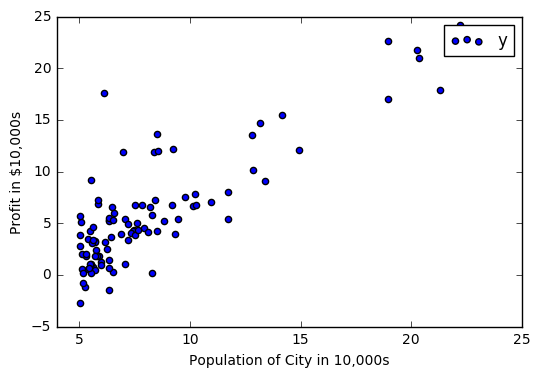

In [2]:
import matplotlib.pyplot as plt
X = data['X']
y = data['y']
m = len(X)
print m
plt.scatter(X, y)
plt.xlim(4, 25)
plt.ylim(-5, 25)
plt.xlabel('Population of City in 10,000s')
plt.ylabel('Profit in $10,000s')
plt.legend()
plt.show()

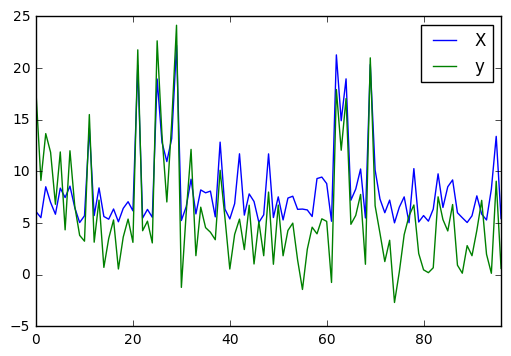

In [3]:
import matplotlib.pyplot as plt # 这是我对pandas自带画图的测试
plt.figure()
data.plot()
plt.show()

In [4]:
import numpy as np

# type(X)
X = X.as_matrix() # 将pandas数据类型转换为numpy类型
y = y.as_matrix()
y.resize(m, 1) # 加上这一句，不然后面会出错，先前测试y.shape()
X = np.column_stack([np.ones((m, 1)), X]) # np.hstack()  按列合并
theta = np.zeros((2, 1))

iteratons = 1500
alpha = 0.01
# print theta

In [5]:
from computeCost import computeCost
from gradientDescent import gradientDescent

In [6]:
computeCost(X, y, theta) # 测试一下

32.072733877455676

In [7]:
theta, J_history = gradientDescent(X, y, theta, alpha, iteratons)

In [8]:
theta[0],theta[1]

(array([-3.63029144]), array([ 1.16636235]))

In [9]:
predict1 = np.dot(np.array([1, 3.5]), theta) * 10000
predict2 = np.dot(np.array([1, 7]), theta) * 10000

In [10]:
print predict1, predict2

[ 4519.7678677] [ 45342.45012945]


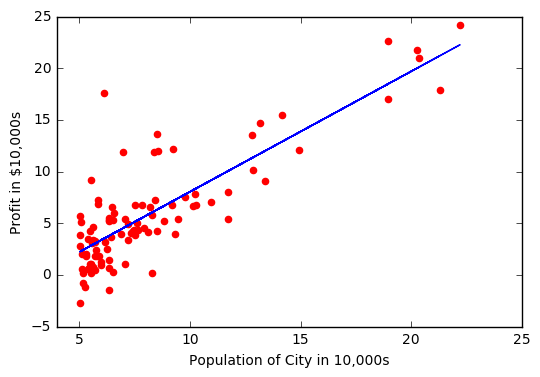

In [11]:
plt.scatter(X[:, 1], y, color='r')
plt.plot(X[:, 1], np.dot(X, theta))
plt.xlim(4, 25)
plt.ylim(-5, 25)
plt.xlabel('Population of City in 10,000s')
plt.ylabel('Profit in $10,000s')
plt.show()

In [12]:
theta0_vals = np.linspace(-10, 10, 100)
theta1_vals = np.linspace(-1, 4, 100)
J_vals = np.zeros((len(theta0_vals), len(theta1_vals)))

for i in range(len(theta0_vals)):
    for j in range(len(theta1_vals)):
        t = np.vstack((theta0_vals[i], theta1_vals[j]))
        J_vals[i,j] = computeCost(X, y, t)

J_vals = J_vals.T
# print J_vals


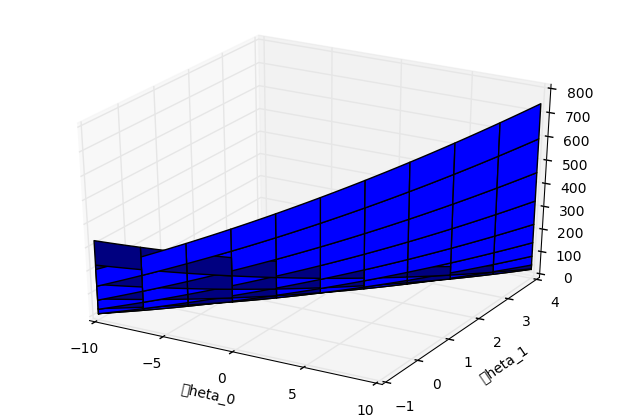

In [13]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = Axes3D(fig)
ax.plot_surface(theta0_vals, theta1_vals, J_vals)
plt.xlabel('\theta_0')
plt.ylabel('\theta_1')
plt.show()

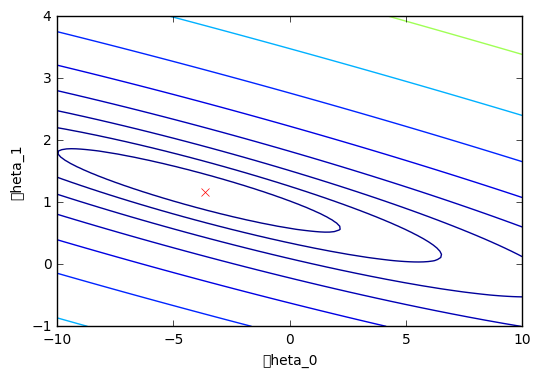

In [14]:
fig = plt.figure()
plt.contour(theta0_vals, theta1_vals, J_vals, np.logspace(-2, 3, 20))
plt.xlabel('\theta_0')
plt.ylabel('\theta_1')
plt.plot(theta[0], theta[1], 'rx')
plt.show()

# Linear regression with multiple variables

In [15]:
import pandas as pd
data = pd.read_csv('ex1data2.csv')
data.head()

,X1,X2,y
0,2104,3,399900
1,1600,3,329900
2,2400,3,369000
3,1416,2,232000
4,3000,4,539900


In [16]:
X = data[['X1','X2']]
y = data['y']
m = len(y)
X = X.as_matrix()
y = y.as_matrix()
y.resize(m, 1)
y.shape

(47, 1)

## 特征归一化

In [17]:
from featureNormalize import featureNormalize
X, mu, sigma = featureNormalize(X)
X

array([[  1.31415422e-01,  -2.26093368e-01],
       [ -5.09640698e-01,  -2.26093368e-01],
       [  5.07908699e-01,  -2.26093368e-01],
       [ -7.43677059e-01,  -1.55439190e+00],
       [  1.27107075e+00,   1.10220517e+00],
       [ -1.99450507e-02,   1.10220517e+00],
       [ -5.93588523e-01,  -2.26093368e-01],
       [ -7.29685755e-01,  -2.26093368e-01],
       [ -7.89466782e-01,  -2.26093368e-01],
       [ -6.44465993e-01,  -2.26093368e-01],
       [ -7.71822042e-02,   1.10220517e+00],
       [ -8.65999486e-04,  -2.26093368e-01],
       [ -1.40779041e-01,  -2.26093368e-01],
       [  3.15099326e+00,   2.43050370e+00],
       [ -9.31923697e-01,  -2.26093368e-01],
       [  3.80715024e-01,   1.10220517e+00],
       [ -8.65782986e-01,  -1.55439190e+00],
       [ -9.72625673e-01,  -2.26093368e-01],
       [  7.73743478e-01,   1.10220517e+00],
       [  1.31050078e+00,   1.10220517e+00],
       [ -2.97227261e-01,  -2.26093368e-01],
       [ -1.43322915e-01,  -1.55439190e+00],
       [ -

In [18]:
print X.shape
X = np.hstack([np.ones((m, 1)), X])
print X.shape

(47, 2)
(47, 3)


## 梯度下降

In [19]:
alpha = 0.01
num_iters = 400
theta = np.zeros((3, 1))


In [20]:
from gradientDescent import gradientDescent
theta, J_history = gradientDescent(X, y, theta, alpha, num_iters)
theta

array([[ 334302.06399328],
       [  99411.44947359],
       [   3267.01285407]])

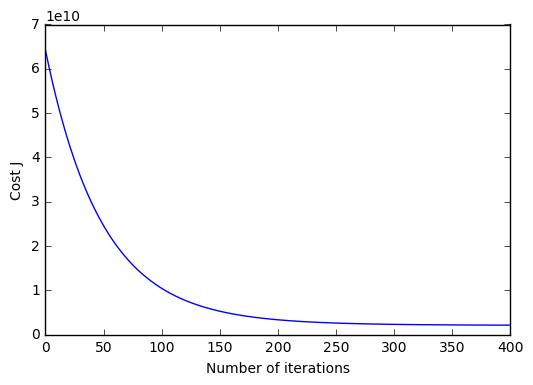

In [21]:
import matplotlib.pyplot as plt
fig = plt.figure()
plt.plot(range(len(J_history)), J_history)
plt.xlabel('Number of iterations')
plt.ylabel('Cost J')
plt.show()

# 下面使用sklearn 线性回归

In [23]:
import pandas as pd
data = pd.read_csv('ex1data2.csv')
data.head()

,X1,X2,y
0,2104,3,399900
1,1600,3,329900
2,2400,3,369000
3,1416,2,232000
4,3000,4,539900


In [24]:
data.tail() # 只有46个数据

,X1,X2,y
42,2567,4,314000
43,1200,3,299000
44,852,2,179900
45,1852,4,299900
46,1203,3,239500


In [25]:
data.shape

(47, 3)

In [26]:
import seaborn as sns
%matplotlib inline

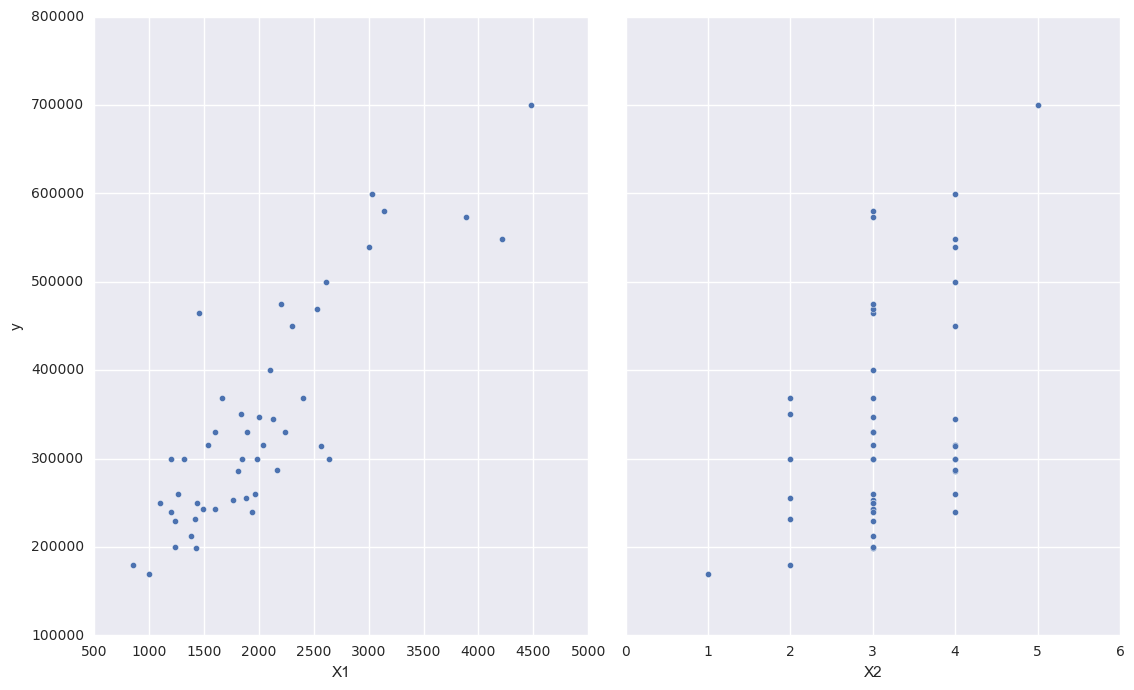

In [27]:
# 可视化
sns.pairplot(data, x_vars=['X1', 'X2'], y_vars='y', size=7, aspect=0.8)

## seaborn的pairplot函数绘制X的每一维度和对应Y的散点图。通过设置size和aspect参数来调节显示的大小和比例。通过加入一个参数kind='reg'，seaborn可以添加一条最佳拟合直线和95%的置信带。

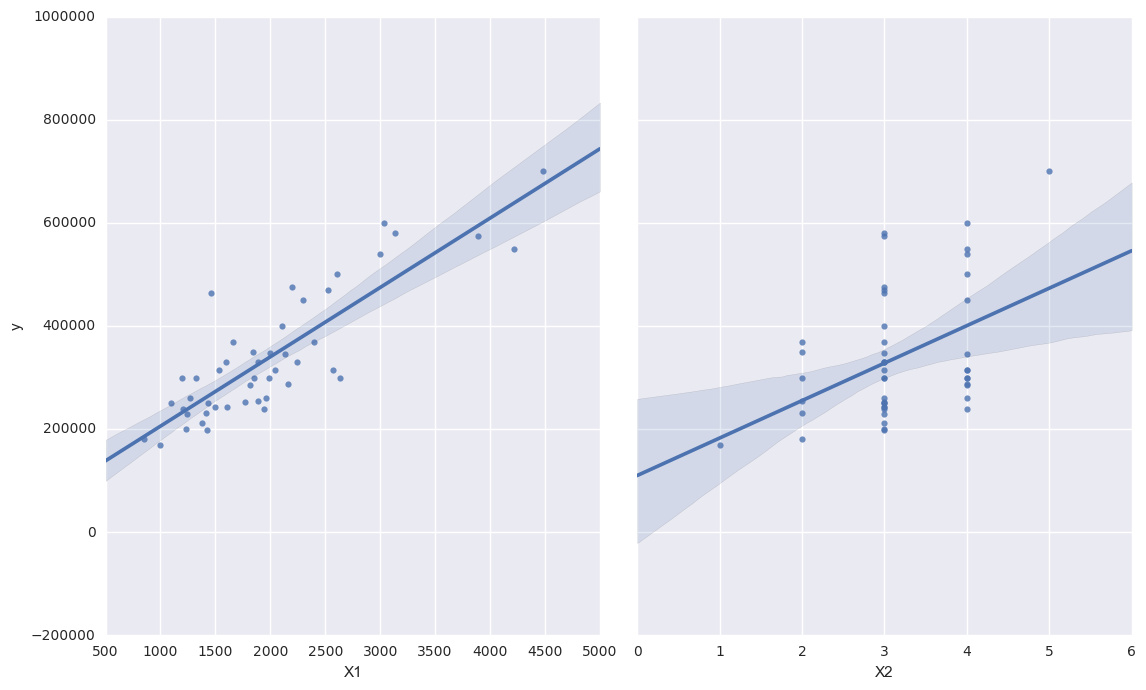

In [28]:
sns.pairplot(data, x_vars=['X1', 'X2'], y_vars='y', size=7, aspect=0.8, kind='reg')

## 使用pandas来构建X和y
- scikit-learn要求X是一个特征矩阵，y是一个NumPy向量
- pandas构建在NumPy之上
- 因此，X可以是pandas的DataFrame，y可以是pandas的Series，scikit-learn可以理解这种结构

In [29]:
X = data[['X1', 'X2']]
X.head()

,X1,X2
0,2104,3
1,1600,3
2,2400,3
3,1416,2
4,3000,4


In [30]:
print type(X)
print X.shape

<class 'pandas.core.frame.DataFrame'>
(47, 2)


In [31]:
y = data['y']
y.head()

0    399900
1    329900
2    369000
3    232000
4    539900
Name: y, dtype: int64

In [32]:
print type(y)
print y.shape

<class 'pandas.core.series.Series'>
(47,)


## 只当做训练集来做学习，来计算一下参数是否与前面相同

In [34]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import scale
X = scale(X)
linreg = LinearRegression()
linreg.fit(X, y)
X # 与先前一致

array([[  1.31415422e-01,  -2.26093368e-01],
       [ -5.09640698e-01,  -2.26093368e-01],
       [  5.07908699e-01,  -2.26093368e-01],
       [ -7.43677059e-01,  -1.55439190e+00],
       [  1.27107075e+00,   1.10220517e+00],
       [ -1.99450507e-02,   1.10220517e+00],
       [ -5.93588523e-01,  -2.26093368e-01],
       [ -7.29685755e-01,  -2.26093368e-01],
       [ -7.89466782e-01,  -2.26093368e-01],
       [ -6.44465993e-01,  -2.26093368e-01],
       [ -7.71822042e-02,   1.10220517e+00],
       [ -8.65999486e-04,  -2.26093368e-01],
       [ -1.40779041e-01,  -2.26093368e-01],
       [  3.15099326e+00,   2.43050370e+00],
       [ -9.31923697e-01,  -2.26093368e-01],
       [  3.80715024e-01,   1.10220517e+00],
       [ -8.65782986e-01,  -1.55439190e+00],
       [ -9.72625673e-01,  -2.26093368e-01],
       [  7.73743478e-01,   1.10220517e+00],
       [  1.31050078e+00,   1.10220517e+00],
       [ -2.97227261e-01,  -2.26093368e-01],
       [ -1.43322915e-01,  -1.55439190e+00],
       [ -

In [36]:
print linreg.intercept_ # 截距
print linreg.coef_  # 系数  这里算出来不一致

340412.659574
[ 109447.79646964   -6578.35485416]


## 构造训练集和测试集

In [37]:
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [38]:
# default split is 75% for training and 25% for testing
print X_train.shape
print y_train.shape
print X_test.shape
print y_test.shape

(35, 2)
(35,)
(12, 2)
(12,)


## Scikit-learn的线性回归

In [39]:
from sklearn.linear_model import LinearRegression

linreg = LinearRegression()
linreg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [40]:
print linreg.intercept_ # 截距
print linreg.coef_  # 系数

342638.59634
[ 117623.11993181  -13733.62189358]


In [41]:
zip(['X1', 'X2'], linreg.coef_)

[('X1', 117623.11993180991), ('X2', -13733.621893583038)]

## 预测

In [42]:
y_pred = linreg.predict(X_test)

## 回归问题的评价测度
### 对于分类问题，评价测度是准确率，但这种方法不适用于回归问题。我们使用针对连续数值的评价测度(evaluation metrics)。下面介绍三种常用的针对回归问题的评价测度

In [43]:
# define true and predicted response values
true = [100, 50, 30, 20]
pred = [90, 50, 50, 30]

- (1)平均绝对误差(Mean Absolute Error, MAE)

1n∑ni=1|yi−yi^|

- (2)均方误差(Mean Squared Error, MSE)

1n∑ni=1(yi−yi^)2

- (3)均方根误差(Root Mean Squared Error, RMSE)

1n∑ni=1(yi−yi^)2−−−−−−−−−−−−−√

In [44]:
from sklearn import metrics
import numpy as np
# calculate MAE by hand
print "MAE by hand:",(10 + 0 + 20 + 10)/4.

# calculate MAE using scikit-learn
print "MAE:",metrics.mean_absolute_error(true, pred)

# calculate MSE by hand
print "MSE by hand:",(10**2 + 0**2 + 20**2 + 10**2)/4.

# calculate MSE using scikit-learn
print "MSE:",metrics.mean_squared_error(true, pred)


# calculate RMSE by hand
print "RMSE by hand:",np.sqrt((10**2 + 0**2 + 20**2 + 10**2)/4.)

# calculate RMSE using scikit-learn
print "RMSE:",np.sqrt(metrics.mean_squared_error(true, pred))

MAE by hand: 10.0
MAE: 10.0
MSE by hand: 150.0
MSE: 150.0
RMSE by hand: 12.2474487139
RMSE: 12.2474487139


In [45]:
print np.sqrt(metrics.mean_squared_error(y_test, y_pred))

84903.2973492


In [130]:
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [131]:
from sklearn.linear_model import LinearRegression

linreg = LinearRegression()
linreg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [132]:
print linreg.intercept_ # 截距
print linreg.coef_  # 系数

342638.59634
[ 117623.11993181  -13733.62189358]


In [133]:
y_pred = linreg.predict(X_test)

In [134]:
print np.sqrt(metrics.mean_squared_error(y_test, y_pred))

84903.2973492
